In [1]:
import numpy as np
import sklearn
from sklearn.datasets import make_moons
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

palette = "Dark2"
%matplotlib inline

As we discussed in class, by taking majority vote, we can combine week learners to become a strong learner. I will give 3 examples for adding trees to the random forest. The first case is a noisy moon made by sklearn. The second is mushroom dataset we used in previous homework. The third one is, again, a noisy moon. But I made the case more extreme and show adding tree might not improve model performance.

**Case 1: a noisy moon**

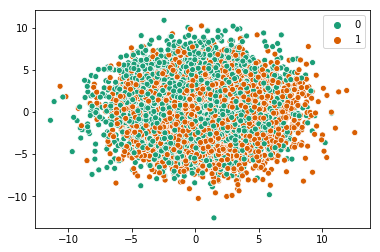

In [2]:
noisy_moons = make_moons(n_samples=10_000, noise=3, random_state=42)

sns.scatterplot(x=noisy_moons[0][:, 0],
                y=noisy_moons[0][:, 1],
                hue=noisy_moons[1],
                palette=palette);

In [3]:
X_train, X_test, y_train, y_test = train_test_split(noisy_moons[0], noisy_moons[1], test_size=0.3, random_state=42)

In [4]:
record_acc = []
record_f1 = []

for i in range(1,100):
    rf_moon = RandomForestClassifier(n_estimators=i,max_depth=None,random_state=42)
    rf_moon.fit(X_train, y_train)
    rf_moon_predict = rf_moon.predict(X_test)
    rf_moon_acc = rf_moon.score(X_test, y_test)
    rf_moon_f1 = f1_score(y_test,rf_moon_predict)
    record_acc.append(rf_moon_acc)
    record_f1.append(rf_moon_f1)

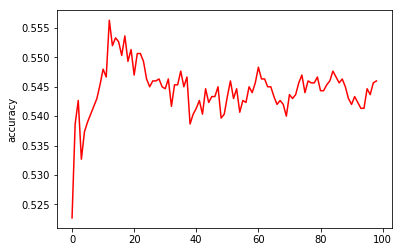

In [5]:
plt.plot(record_acc,color='red')
plt.ylabel('accuracy')
plt.show()

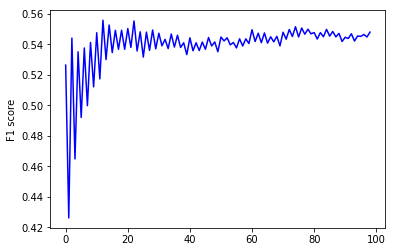

In [6]:
plt.plot(record_f1,color='blue')
plt.ylabel('F1 score')
plt.show()

As we can see from the graph above, as we add trees to the random forest, the model performance improved.

**Case2 : Mushroom**

In [7]:
import os

from urllib.request import urlretrieve

path_remote = "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/"
path_local = "."
filename = "agaricus-lepiota.data"
def download_data(path_remote: str, path_local: str, filename: str) -> None:
    local_file = os.path.join(path_local, filename)
    if os.path.isfile(local_file) and os.access(local_file, os.R_OK):
        pass
    else:
        urlretrieve(path_remote+filename,filename=local_file)
local_file = os.path.join(path_local, filename)
if os.path.exists(local_file):
    os.remove(local_file)
    
download_data(path_remote, path_local, filename)
mushroom = pd.read_table(filename,sep=",",header=None)
label = mushroom[0]
poison = pd.get_dummies(label)
labels = poison.iloc[:,1]

feature = mushroom.drop(0,axis=1)
features = pd.get_dummies(feature)
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

In [8]:
record_mushroom_acc = []
record_mushroom_f1 = []

for i in range(1,100):
    rf_mushroom = RandomForestClassifier(n_estimators=i,max_depth=2,random_state=42)
    rf_mushroom.fit(X_train, y_train)
    rf_mushroom_predict = rf_mushroom.predict(X_test)
    rf_mushroom_acc = rf_mushroom.score(X_test, y_test)
    rf_mushroom_f1 = f1_score(y_test,rf_mushroom_predict)
    record_mushroom_acc.append(rf_mushroom_acc)
    record_mushroom_f1.append(rf_mushroom_f1)

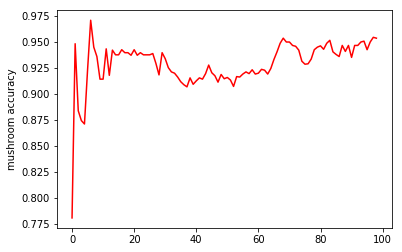

In [9]:
plt.plot(record_mushroom_acc,color='red')
plt.ylabel('mushroom accuracy')
plt.show()

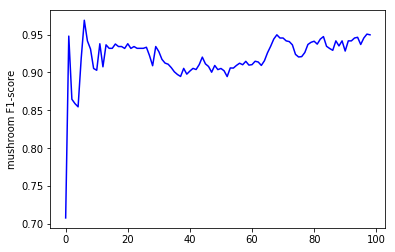

In [10]:
plt.plot(record_mushroom_f1,color='blue')
plt.ylabel('mushroom F1-score')
plt.show()

As we can see from the graph above, as we add trees to the random forest, the model performance improved.

**Case 3: Noisy Moon again**

**In some extreme case, add trees does not necessarily improve performance.**

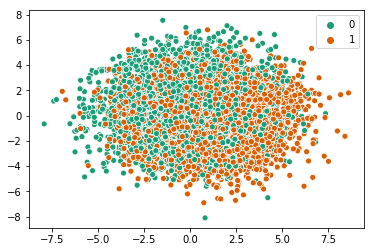

In [11]:
noisy_moons = make_moons(n_samples=10_000, noise=2, random_state=42)

sns.scatterplot(x=noisy_moons[0][:, 0],
                y=noisy_moons[0][:, 1],
                hue=noisy_moons[1],
                palette=palette);
X_train, X_test, y_train, y_test = train_test_split(noisy_moons[0], noisy_moons[1], test_size=0.3, random_state=42)

In [12]:
record_acc = []
record_f1 = []

for i in range(1,200):
    rf_moon = RandomForestClassifier(n_estimators=i,max_depth=1,random_state=42)
    rf_moon.fit(X_train, y_train)
    rf_moon_predict = rf_moon.predict(X_test)
    rf_moon_acc = rf_moon.score(X_test, y_test)
    rf_moon_f1 = f1_score(y_test,rf_moon_predict)
    record_acc.append(rf_moon_acc)
    record_f1.append(rf_moon_f1)

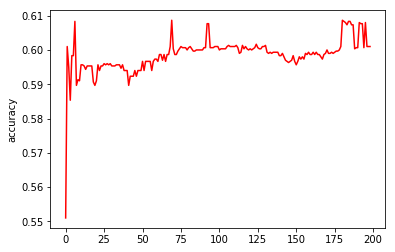

In [13]:
plt.plot(record_acc,color='red')
plt.ylabel('accuracy')
plt.show()

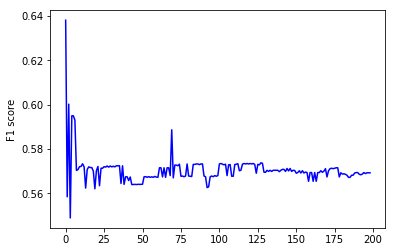

In [14]:
plt.plot(record_f1,color='blue')
plt.ylabel('F1 score')
plt.show()